# Group 3 NYC AirBnB Data Principle Component Analysis

## Step-1: Import Packages,  Data Exploration & Cleaning
Intent should be to maximize information content while minimizing the number of dimensions or variables in the datset. Most of the variables in the dataframe have non null values except 'last_review', 'reviews_per_month', and 'license'. These columns are believed to have either little information value, or are believed to have other variables that would explain their effects anyway. Thus the aforementioned columns were removed. In addition all observations with zero values in the 'price' column were removed. It is assumed that the 'price'  will be the primary variable of interest.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sb
import plotly.express as px

In [2]:
df = pd.read_csv('Grp3Project_InitialData/listings.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39881 non-null  int64  
 1   name                            39868 non-null  object 
 2   host_id                         39881 non-null  int64  
 3   host_name                       39831 non-null  object 
 4   neighbourhood_group             39881 non-null  object 
 5   neighbourhood                   39881 non-null  object 
 6   latitude                        39881 non-null  float64
 7   longitude                       39881 non-null  float64
 8   room_type                       39881 non-null  object 
 9   price                           39881 non-null  int64  
 10  minimum_nights                  39881 non-null  int64  
 11  number_of_reviews               39881 non-null  int64  
 12  last_review                     

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39851 entries, 0 to 39880
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39851 non-null  int64  
 1   neighbourhood_group             39851 non-null  object 
 2   latitude                        39851 non-null  float64
 3   longitude                       39851 non-null  float64
 4   room_type                       39851 non-null  object 
 5   price                           39851 non-null  int64  
 6   minimum_nights                  39851 non-null  int64  
 7   number_of_reviews               39851 non-null  int64  
 8   calculated_host_listings_count  39851 non-null  int64  
 9   availability_365                39851 non-null  int64  
 10  number_of_reviews_ltm           39851 non-null  int64  
 11  lat_lon                         39851 non-null  float64
dtypes: float64(3), int64(7), object(

None

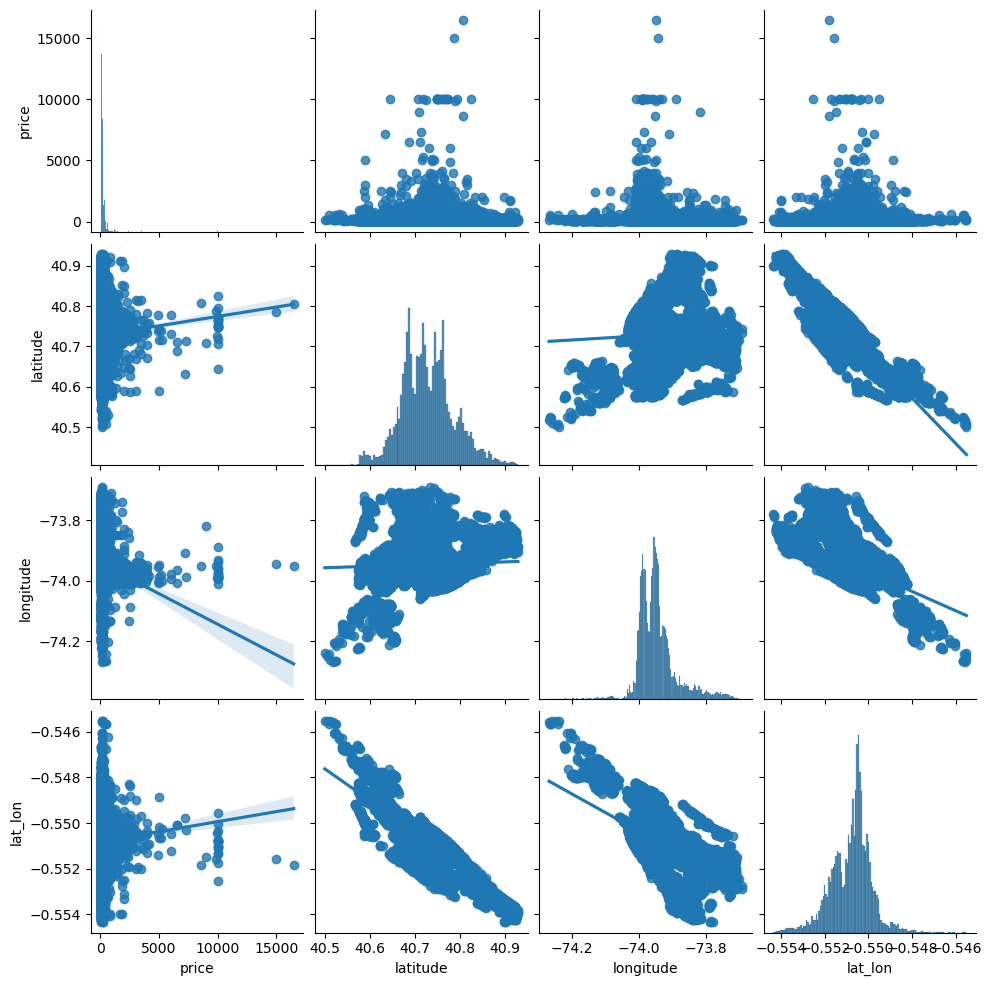

In [3]:
# remove deemed to be less than useful
df['lat_lon']= df['latitude']/df['longitude']
df = df.drop(['license', 'reviews_per_month','last_review', 'name', 'host_id','neighbourhood', 'host_name'],axis = 1)
df = df.loc[(df['price']> 0)]# Remove all zero values from the price
display(df.info())
sb.pairplot(df[['price','latitude','longitude','lat_lon']], kind="reg")
plt.show()

The pairplot was developed to gain an understanding of the relationship between 'latitiude', 'longitude', and 'price'. Based on this visualization, that correlation appears to be weak.

# Step 2: Determine & Remove the Outliers
Process was to remove all outliers larger than q3 + (1.5 * IQR), or less than or equal to the minimum. In addition the latitude and longitude columns were removed from the dataset and replaced with the transformation 'lat_lon', which is the ratio latitude to longitude. The result reduced the number of observations in the data from 39881 to 36524.

In [4]:
df_stats = df.groupby('room_type')['price'].describe()
df_stats.reindex()
display(df_stats)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,22761.0,251.546022,338.044654,10.0,128.00,180.0,275.0,15000.0
Hotel room,172.0,436.470930,282.491141,100.0,258.75,308.0,501.5,1998.0
Private room,16361.0,122.936495,356.373737,10.0,55.00,75.0,110.0,16500.0
Shared room,557.0,119.398564,454.106078,10.0,42.00,66.0,92.0,10000.0


In [5]:
# Create Table with outliers
df_stats['IQR'] = df_stats["75%"]- df_stats["25%"]
df_stats['upper_outlier'] = df_stats["75%"] + (1.5 * df_stats['IQR'])
df_stats['lower_outlier'] = df_stats["25%"] - (1.5 * df_stats['IQR'])
display(df_stats)

,count,mean,std,min,25%,50%,75%,max,IQR,upper_outlier,lower_outlier
room_type,,,,,,,,,,,
Entire home/apt,22761.0,251.546022,338.044654,10.0,128.00,180.0,275.0,15000.0,147.00,495.500,-92.500
Hotel room,172.0,436.470930,282.491141,100.0,258.75,308.0,501.5,1998.0,242.75,865.625,-105.375
Private room,16361.0,122.936495,356.373737,10.0,55.00,75.0,110.0,16500.0,55.00,192.500,-27.500
Shared room,557.0,119.398564,454.106078,10.0,42.00,66.0,92.0,10000.0,50.00,167.000,-33.000


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1530.0,108.036601,68.561010,10.0,60.0,89.0,135.00,450.0
Brooklyn,14192.0,133.914459,88.425233,10.0,69.0,110.0,175.00,529.0
Manhattan,14426.0,180.040690,105.605595,10.0,100.0,150.0,235.00,826.0
Queens,5954.0,114.189620,79.028227,10.0,60.0,90.0,145.00,495.0
Staten Island,422.0,113.646919,61.827482,33.0,69.0,99.5,140.75,412.0


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,21117.0,196.250793,95.382230,10.0,125.0,175.0,250.0,496.0
Hotel room,155.0,363.490323,163.471288,100.0,248.5,307.0,470.0,826.0
Private room,14751.0,78.448648,34.294310,10.0,52.0,72.0,97.0,192.0
Shared room,501.0,66.179641,32.916921,10.0,40.0,60.0,85.0,165.0


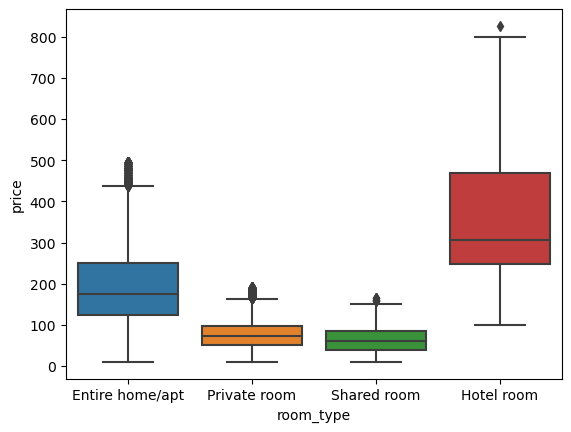

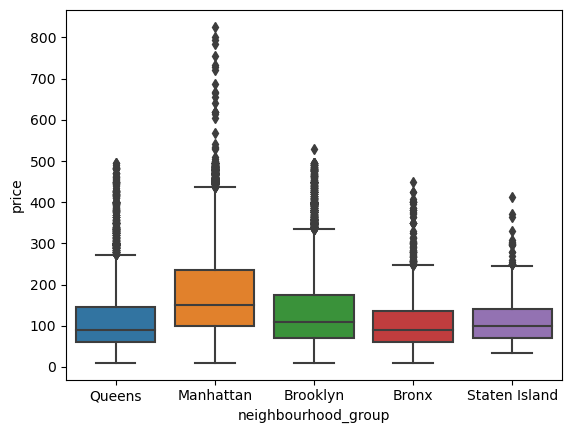

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36524 entries, 2 to 19816
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36524 non-null  int64  
 1   neighbourhood_group             36524 non-null  object 
 2   latitude                        36524 non-null  float64
 3   longitude                       36524 non-null  float64
 4   room_type                       36524 non-null  object 
 5   price                           36524 non-null  int64  
 6   minimum_nights                  36524 non-null  int64  
 7   number_of_reviews               36524 non-null  int64  
 8   calculated_host_listings_count  36524 non-null  int64  
 9   availability_365                36524 non-null  int64  
 10  number_of_reviews_ltm           36524 non-null  int64  
 11  lat_lon                         36524 non-null  float64
dtypes: float64(3), int64(7), object(

None

,id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,lat_lon
id,1.000000,-0.006021,0.090372,0.100288,-0.114942,-0.187285,0.041516,0.295017,-0.084761,-0.036796
latitude,-0.006021,1.000000,0.057068,0.023211,0.033942,-0.032738,0.031671,-0.021543,-0.042166,-0.886394
longitude,0.090372,0.057068,1.000000,-0.221445,-0.099553,0.040181,-0.063658,0.143466,0.077105,-0.512761
price,0.100288,0.023211,-0.221445,1.000000,-0.088323,-0.000474,0.152782,0.155715,0.082033,0.082805
minimum_nights,-0.114942,0.033942,-0.099553,-0.088323,1.000000,-0.147075,0.124210,-0.054423,-0.234587,0.017041
number_of_reviews,-0.187285,-0.032738,0.040181,-0.000474,-0.147075,1.000000,-0.096784,0.089859,0.629522,0.009497
calculated_host_listings_count,0.041516,0.031671,-0.063658,0.152782,0.124210,-0.096784,1.000000,0.131778,-0.059441,0.002320
availability_365,0.295017,-0.021543,0.143466,0.155715,-0.054423,0.089859,0.131778,1.000000,0.160993,-0.048121
number_of_reviews_ltm,-0.084761,-0.042166,0.077105,0.082033,-0.234587,0.629522,-0.059441,0.160993,1.000000,0.000450
lat_lon,-0.036796,-0.886394,-0.512761,0.082805,0.017041,0.009497,0.002320,-0.048121,0.000450,1.000000


In [6]:
df1 = df[(df['room_type'] == "Entire home/apt") & (df['price']>=10) & (df['price']<= 496)]
df2 = df[(df['room_type'] == "Private room") & (df['price']>= 10) & (df['price']<= 192)]
df3 = df[(df['room_type'] == "Shared room") & (df['price']>= 10) & (df['price']<= 167)] 
df4 = df[(df['room_type'] == "Hotel room") & (df['price']>= 100) & (df['price']<= 865)]
frames = [df1, df2, df3, df4]
df = pd.concat(frames)

display(df.groupby('neighbourhood_group')['price'].describe())
display(df.groupby('room_type')['price'].describe())
sb.boxplot(y = df['price'], x = df['room_type'])
plt.show()
sb.boxplot(y = df['price'], x = df['neighbourhood_group'])
plt.show()
display(df.info())
display(df.corr())

In [7]:
df_select = df[['price','lat_lon','neighbourhood_group','room_type', 'minimum_nights', 'number_of_reviews','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36524 entries, 2 to 19816
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           36524 non-null  int64  
 1   lat_lon                         36524 non-null  float64
 2   neighbourhood_group             36524 non-null  object 
 3   room_type                       36524 non-null  object 
 4   minimum_nights                  36524 non-null  int64  
 5   number_of_reviews               36524 non-null  int64  
 6   calculated_host_listings_count  36524 non-null  int64  
 7   availability_365                36524 non-null  int64  
 8   number_of_reviews_ltm           36524 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.8+ MB


# Step 3:  Incorporate Categorical Variables into the Data and Scale the Dataset
The purpose of this step was to incorporate room type and neighborhood or NYC burrough into the dataset as "dummy variables" using one hot encoding. Also conducted during this step was a targeted correlation between price and the remaining variables.The strongest positive correlations were room types of 'Entire home/apt', neighborhood groups of 'Manhattan' and 365 day availability. Strongest negative correlation was a room type of "Private room". Finally the dataset was normalized.

In [8]:
 # One-hot encode the neighbourhood_group column
dfx = pd.concat([df_select,
               pd.get_dummies(df_select['neighbourhood_group'])],axis=1)


In [9]:
 # One-hot encode the room_type column
X = pd.concat([dfx,
               pd.get_dummies(dfx['room_type'])],axis=1)
            
# Drop the original categorical column and the response variable
df = X.drop(['neighbourhood_group','room_type'], axis=1)
display(df.info())
display(df[df.columns[0:]].corr()['price'][:].sort_values(ascending=False).to_frame())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36524 entries, 2 to 19816
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           36524 non-null  int64  
 1   lat_lon                         36524 non-null  float64
 2   minimum_nights                  36524 non-null  int64  
 3   number_of_reviews               36524 non-null  int64  
 4   calculated_host_listings_count  36524 non-null  int64  
 5   availability_365                36524 non-null  int64  
 6   number_of_reviews_ltm           36524 non-null  int64  
 7   Bronx                           36524 non-null  uint8  
 8   Brooklyn                        36524 non-null  uint8  
 9   Manhattan                       36524 non-null  uint8  
 10  Queens                          36524 non-null  uint8  
 11  Staten Island                   36524 non-null  uint8  
 12  Entire home/apt                 

None

,price
price,1.000000
Entire home/apt,0.585895
Manhattan,0.269626
availability_365,0.155715
calculated_host_listings_count,0.152782
Hotel room,0.144978
lat_lon,0.082805
number_of_reviews_ltm,0.082033
number_of_reviews,-0.000474
Staten Island,-0.037760


In [10]:
X = scale(df)# Normalize the data
display(pd.DataFrame(X).describe().transpose())# Display the normalize data statistics
corr_ = pd.DataFrame(X).corr() #Display the correlation matrix for the normalized data
pd.DataFrame(corr_).style.background_gradient(cmap = 'YlOrRd')

,count,mean,std,min,25%,50%,75%,max
0,36524.0,5.539893e-15,1.000014,-1.415415,-0.746793,-0.283901,0.436153,6.978363
1,36524.0,9.434973e-14,1.000014,-3.783566,-0.643971,0.177789,0.568060,5.630077
2,36524.0,-1.498075e-14,1.000014,-0.587472,-0.556147,0.258299,0.320948,38.537241
3,36524.0,3.666876e-16,1.000014,-0.489330,-0.471433,-0.381952,-0.024027,25.997131
4,36524.0,-1.983690e-14,1.000014,-0.263174,-0.263174,-0.263174,-0.228420,7.591338
5,36524.0,7.306705e-15,1.000014,-0.932757,-0.932757,-0.429781,1.028121,1.727913
6,36524.0,7.110498e-15,1.000014,-0.472989,-0.472989,-0.411815,-0.044770,53.849669
7,36524.0,4.900318e-14,1.000014,-0.209098,-0.209098,-0.209098,-0.209098,4.782457
8,36524.0,2.021351e-15,1.000014,-0.797183,-0.797183,-0.797183,1.254417,1.254417
9,36524.0,-1.425716e-14,1.000014,-0.807972,-0.807972,-0.807972,1.237666,1.237666


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.082805,-0.088323,-0.000474,0.152782,0.155715,0.082033,-0.085095,-0.112220,0.269626,-0.151669,-0.037760,0.585895,0.144978,-0.585485,-0.098770
1,0.082805,1.000000,0.017041,0.009497,0.002320,-0.048121,0.000450,-0.492280,0.576398,-0.236596,-0.273398,0.321136,0.088623,-0.000014,-0.083587,-0.023660
2,-0.088323,0.017041,1.000000,-0.147075,0.124210,-0.054423,-0.234587,-0.060490,-0.018337,0.099410,-0.064700,-0.034070,-0.006647,-0.028905,0.010089,0.001815
3,-0.000474,0.009497,-0.147075,1.000000,-0.096784,0.089859,0.629522,0.006102,0.025945,-0.055635,0.030901,0.017911,0.022851,0.044267,-0.026437,-0.010235
4,0.152782,0.002320,0.124210,-0.096784,1.000000,0.131778,-0.059441,-0.046750,-0.101159,0.114416,0.014788,-0.025462,0.014032,0.001746,-0.008779,-0.023518
5,0.155715,-0.048121,-0.054423,0.089859,0.131778,1.000000,0.160993,0.102307,-0.075341,-0.060966,0.105373,0.066505,0.055361,0.044967,-0.064226,0.010751
6,0.082033,0.000450,-0.234587,0.629522,-0.059441,0.160993,1.000000,0.026521,0.002098,-0.073314,0.071627,0.028496,0.050213,0.022147,-0.049378,-0.017275
7,-0.085095,-0.492280,-0.060490,0.006102,-0.046750,0.102307,0.026521,1.000000,-0.166689,-0.168945,-0.092280,-0.022607,-0.044166,-0.013651,0.042079,0.017640
8,-0.112220,0.576398,-0.018337,0.025945,-0.101159,-0.075341,0.002098,-0.166689,1.000000,-0.644102,-0.351815,-0.086188,-0.048267,-0.047722,0.058642,-0.015778
9,0.269626,-0.236596,0.099410,-0.055635,0.114416,-0.060966,-0.073314,-0.168945,-0.644102,1.000000,-0.356577,-0.087355,0.153711,0.069598,-0.165311,0.005835


# Step 4: Principal Component Analysis
The PCA was conducted on the normalized data and indicate the following results:
- The most important variables in the dataset are 'price', 'Manhattan', 'Entire home/apt', and 'Private room'
- The least significant variables seem to be 'Hotel room' and 'Queens'.
- Information content in the data is dispersed. There dont seem to be any significant clusters of variability. As indicated by the scree plot and the measures of the cumulative variability, you dont get above 90% of the variability explained until you get to 11 of the 16 principal components. Once you get to roughly 13 principal components, marginal variability apears to go to zero. As evidenced by the correlation matrices and the heatmaps, most of the variables could be considered to have a significant component loading depending on the dimension in which they are viewed. The practical effect of this seems to be that action taken to reduce the dimensionality of the dataset won't add any significant benefits.

In [11]:
# Select the number of components
pca1 = PCA(n_components=16)
# Fit the PCA model
pca1.fit(X)

PCA(n_components=16)

In [12]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_
display(var)

array([1.65195096e-01, 1.34942542e-01, 1.17200904e-01, 8.08398602e-02,
       7.70139078e-02, 6.83907993e-02, 6.70856015e-02, 6.42368108e-02,
       6.33128426e-02, 5.42576742e-02, 4.61935056e-02, 2.61700494e-02,
       2.17283626e-02, 1.34320435e-02, 6.22380475e-33, 5.16641682e-33])

In [13]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
display(var1)

array([16.52, 30.01, 41.73, 49.81, 57.51, 64.35, 71.06, 77.48, 83.81,
       89.24, 93.86, 96.48, 98.65, 99.99, 99.99, 99.99])

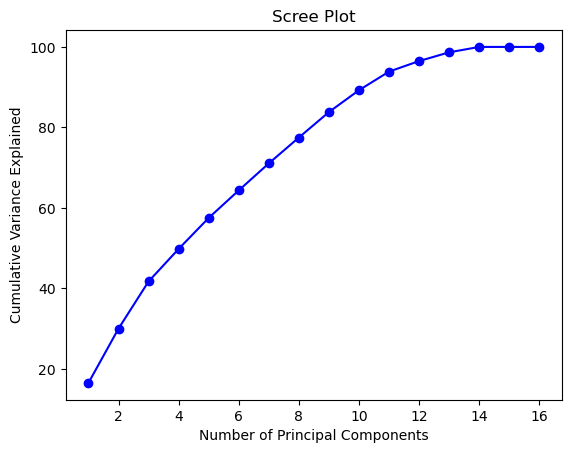

In [14]:
var1 = pd.DataFrame(var1, index=np.arange(1,17))
plt.plot(var1,'-o',color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')
plt.show()

In [15]:
# Select the number of components
pca16 = PCA(n_components=16)
pca16.fit(X)
data_pca16 = pca16.transform(X)

# Convert the numpy array to pandas DataFrame
data_pca16 = pd.DataFrame(data_pca16)
data_pca16.columns = ["PC"+str(i) for i in range(1,17)]

# Show the head of the DataFrame
display(data_pca16.head())
display(data_pca16.corr())


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.985462,-0.577469,0.687516,-1.269858,-2.613957,-0.497312,-0.356578,0.348281,-0.725955,0.259770,-1.033230,1.721738,-1.038442,0.247408,3.330669e-16,7.771561e-16
1,1.649282,-0.675217,-0.170214,0.425239,-0.003942,0.126435,0.262893,-0.061995,0.360419,0.214147,-1.145967,-0.686522,-0.364044,0.242477,3.330669e-16,-7.216450e-16
2,1.295075,2.063616,-0.424649,-0.932033,-0.293281,0.386445,-0.234463,0.151246,-0.287277,-0.102477,-0.403823,0.576902,-0.259064,0.234949,-2.220446e-16,4.996004e-16
3,0.623319,1.974616,-0.481647,-0.789052,0.378923,-0.226539,-0.271675,0.031405,0.009326,0.479975,0.344678,-0.244835,-0.305966,0.151578,-2.220446e-16,1.110223e-16
4,1.784482,-0.174928,2.224686,1.621296,0.475536,0.107636,-0.095550,-0.043105,1.363229,1.097498,-1.097350,-1.618384,-2.879385,0.585529,7.771561e-16,-8.326673e-16


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
PC1,1.000000e+00,1.523014e-16,-5.197114e-17,9.291861e-16,-4.821917e-16,9.808515e-16,-2.083315e-16,2.422911e-16,3.451393e-16,1.430505e-15,-1.990741e-16,1.357457e-15,-8.221773e-16,4.365259e-16,0.186571,-0.199935
PC2,1.523014e-16,1.000000e+00,1.836350e-16,-2.551501e-16,-3.359047e-16,-5.094300e-17,1.174007e-16,-9.892546e-18,1.382529e-16,8.108446e-16,-4.979036e-16,-2.945410e-16,1.079519e-16,6.689318e-16,-0.333345,0.081764
PC3,-5.197114e-17,1.836350e-16,1.000000e+00,7.357477e-17,1.987143e-16,-2.004536e-16,-4.495121e-16,1.332121e-17,5.788909e-17,5.434269e-17,7.493605e-17,3.759816e-16,1.784906e-15,5.733677e-16,-0.198341,0.071493
PC4,9.291861e-16,-2.551501e-16,7.357477e-17,1.000000e+00,-8.831691e-18,-4.671867e-16,-3.279430e-16,3.184741e-16,-2.345375e-17,-1.063903e-15,-5.804964e-16,-2.428702e-17,1.259448e-16,-1.636388e-16,0.453665,-0.645487
PC5,-4.821917e-16,-3.359047e-16,1.987143e-16,-8.831691e-18,1.000000e+00,2.192629e-16,2.427761e-16,4.448873e-16,9.724887e-17,3.242284e-16,-5.086496e-16,-2.775468e-16,3.045571e-17,5.346449e-16,0.071309,0.188502
PC6,9.808515e-16,-5.094300e-17,-2.004536e-16,-4.671867e-16,2.192629e-16,1.000000e+00,-3.330281e-16,1.797741e-17,8.215171e-16,6.299404e-16,6.999940e-16,4.284994e-16,-2.101045e-16,9.401530e-16,-0.201788,0.323154
PC7,-2.083315e-16,1.174007e-16,-4.495121e-16,-3.279430e-16,2.427761e-16,-3.330281e-16,1.000000e+00,-7.507384e-16,9.572675e-16,9.259192e-16,6.108923e-16,2.539663e-16,-3.396047e-16,-9.551215e-16,0.106846,-0.182019
PC8,2.422911e-16,-9.892546e-18,1.332121e-17,3.184741e-16,4.448873e-16,1.797741e-17,-7.507384e-16,1.000000e+00,-2.282171e-16,1.143042e-16,-7.572605e-16,-6.436984e-17,-1.146200e-16,2.985484e-16,-0.457940,0.173199
PC9,3.451393e-16,1.382529e-16,5.788909e-17,-2.345375e-17,9.724887e-17,8.215171e-16,9.572675e-16,-2.282171e-16,1.000000e+00,-4.881320e-16,-2.781155e-16,7.277594e-16,-2.123849e-16,3.570321e-16,-0.435207,-0.121227
PC10,1.430505e-15,8.108446e-16,5.434269e-17,-1.063903e-15,3.242284e-16,6.299404e-16,9.259192e-16,1.143042e-16,-4.881320e-16,1.000000e+00,6.590839e-17,2.748950e-16,-7.692103e-17,7.047150e-16,-0.059290,0.104858


All pairwise combinations are cose to zero which is indicative of no multicollinearity among principal components.


In [16]:
# Show the loadings for the 1st components
pca16.components_[[0]]

array([[ 0.49436566,  0.04118856, -0.01297004,  0.02628435,  0.08448953,
         0.0832199 ,  0.05627946, -0.06993217, -0.13351556,  0.27544056,
        -0.15112606,  0.0024715 ,  0.55148041,  0.05822177, -0.55213588,
        -0.04485018]])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
price,0.494366,0.019726,0.024750,0.013123,-0.082987,0.118820,-0.118382,0.012789,-0.142628,-0.134824,-0.003869,0.757667,-0.312720,-0.094119,0.000000,0.000000
lat_lon,0.041189,0.592048,-0.107348,0.218596,-0.141812,-0.011429,0.087850,0.017217,-0.002317,-0.033825,-0.022378,0.042853,-0.000951,0.746145,0.000000,-0.000000
minimum_nights,-0.012970,-0.037755,-0.347262,0.050110,-0.093974,0.040430,-0.133461,0.018612,0.394311,0.796024,-0.103264,0.212317,0.040142,-0.013854,-0.000000,0.000000
number_of_reviews,0.026284,0.071200,0.552707,0.273389,0.175848,-0.049760,-0.104132,-0.007327,0.228779,0.221871,0.094714,-0.212012,-0.643504,0.011531,0.000000,-0.000000
calculated_host_listings_count,0.084490,-0.094115,-0.140241,0.169653,-0.455272,0.337139,-0.288567,0.030013,0.324731,-0.235346,0.581545,-0.173810,0.017159,-0.030162,-0.000000,-0.000000
availability_365,0.083220,-0.065082,0.247721,-0.046817,-0.452562,0.447795,0.051175,0.099129,0.112693,-0.059676,-0.680342,-0.168357,-0.003885,-0.004160,-0.000000,-0.000000
number_of_reviews_ltm,0.056279,0.057868,0.594665,0.230606,0.089309,-0.016554,-0.090609,-0.020525,0.197982,0.054122,0.081691,0.260563,0.673028,-0.011755,-0.000000,-0.000000
Bronx,-0.069932,-0.277898,0.158760,-0.456528,0.241822,0.490120,0.220642,-0.137241,0.047105,0.114314,0.233853,0.109733,-0.035246,0.417605,0.195272,-0.149211
Brooklyn,-0.133516,0.584626,-0.021376,-0.215595,0.127282,0.192071,-0.233596,0.084471,0.035789,-0.027639,-0.014284,-0.016206,0.006306,-0.344373,0.475098,-0.363031
Manhattan,0.275441,-0.341754,-0.218352,0.498337,0.244525,-0.034873,0.055357,-0.037286,0.086747,-0.137065,-0.183061,-0.104373,0.051653,0.113467,0.476482,-0.364089


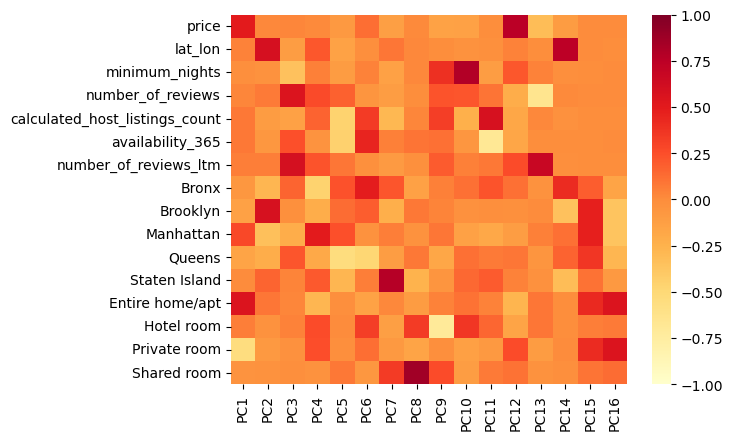

In [17]:
corr_16 = pd.DataFrame(pca16.components_.transpose(),
             index=df.loc[:,'price':'Shared room'].columns,
             columns=["PC"+str(i) for i in range(1,17)])
display(pd.DataFrame(corr_16).style.background_gradient(cmap = 'YlOrRd'))
ax = sb.heatmap(corr_16, annot=False, cmap = 'YlOrRd', vmin = -1, vmax = 1)
plt.show()